Run the cells below:

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pandas_datareader as pdr

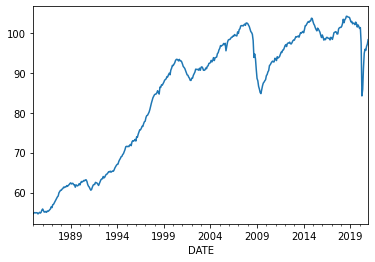

In [3]:
df = pdr.DataReader(name=['INDPRO','USEPUINDXM'], data_source='fred',
                   start = '1985-01-01', end = '2020-12-31')

df.rename(columns = {'INDPRO':'IPRO', 'USEPUINDXM':'EPU'}, inplace = True)
df.head()
df['IPRO'].plot();

In [4]:
df = df.sort_index()
df['future_IPRO'] = df['IPRO'].shift(-12) - df['IPRO'] #i.e. the 12-month future change in IPRO
df['const'] = 1
df.dropna(inplace = True)
df

,IPRO,EPU,future_IPRO,const
DATE,,,,
1985-01-01,54.7203,125.22474,1.1590,1
1985-02-01,54.9100,99.02081,0.5863,1
1985-03-01,54.9841,112.19051,0.1129,1
1985-04-01,54.8853,102.81133,0.2747,1
1985-05-01,54.9520,120.08273,0.3036,1
...,...,...,...,...
2019-08-01,102.6882,190.46324,-6.7958,1
2019-09-01,102.3143,134.36179,-6.7124,1
2019-10-01,101.4645,118.48822,-4.8191,1


Regress future industrial production changes (``future_IPRO``) on current policy uncertainty (``EPU``) and the constant.

Using the regression results above, does economic policy uncertainty have a statistically significant effect on changes in future industrial production at the 95\% confidence level?

A: 

Using the results of the regression above, what is the expected change in industrial production over the next 12 months, if the current policy uncertainty level is 100?

Using the results of the regression above (and only the data available in ``df``), what is the expected change in industrial production over the next 12 months?

Create a dummy variable called ``after2000`` which equals 1 after the year 2000 and 0 before. Then interact this dummy variable with the ``EPU`` variable and call this interaction variable ``EPU_x_after2000``. 

In [12]:
df['year']= df.index.to_series().dt.year
df['after2000'] = np.where(df['year'] > 2000, 1, 0)
df['EPU_x_after2000'] = df['EPU'] * df['after2000']
df

,IPRO,EPU,future_IPRO,const,year,after2000,EPU_x_after2000
DATE,,,,,,,
1985-01-01,54.7203,125.22474,1.1590,1,1985,0,0.00000
1985-02-01,54.9100,99.02081,0.5863,1,1985,0,0.00000
1985-03-01,54.9841,112.19051,0.1129,1,1985,0,0.00000
1985-04-01,54.8853,102.81133,0.2747,1,1985,0,0.00000
1985-05-01,54.9520,120.08273,0.3036,1,1985,0,0.00000
...,...,...,...,...,...,...,...
2019-08-01,102.6882,190.46324,-6.7958,1,2019,1,190.46324
2019-09-01,102.3143,134.36179,-6.7124,1,2019,1,134.36179
2019-10-01,101.4645,118.48822,-4.8191,1,2019,1,118.48822


Regress ``future_IPRO`` on the ``EPU`` variable, the ``after2000`` dummy variable, and the interaction term you created above. 

In [13]:
res = sm.OLS(endog = df['future_IPRO'],
            exog = df[['const','after2000', 'EPU', 'EPU_x_after2000']],
            missing='drop').fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            future_IPRO   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     12.29
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.02e-07
Time:                        17:32:15   Log-Likelihood:                -1132.6
No. Observations:                 420   AIC:                             2273.
Df Residuals:                     416   BIC:                             2289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.0772      1.142     

Based on the results of this last regression, **prior to the year 2000**, does economic policy uncertainty have a significant effect on future changes in industrial production at the 95\% confidence level?

A: 

Based on the results of this last regression, is the effect of economic policy uncertainty on future changes in industrial production significantly weaker (not as negative) after the year 2000 then prior to 2000 (at the 95\% confidence level)?

A: 